In [1]:
import os
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import snapfish2 as sf
from utils.data import DataTree
dtree = DataTree("../data")
importlib.reload(sf)

<module 'snapfish2' from '/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/__init__.py'>

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
dtree["murphy_ng_2024"].keys()

dict_keys(['diff', 'dTAG', 'control', 'control2i', 'brain'])

In [5]:
loader = sf.pp.FOF_CT_Loader({rep: dtree["murphy_ng_2024","dTAG",rep,"trace"]
                              for rep in ["rep1", "rep2"]})
adata = loader.create_adata("chr6")
adata

AnnData object with n_obs × n_vars = 1614 × 62
    var: 'Chrom_Start', 'Chrom_End'
    uns: 'Chrom'
    layers: 'X', 'Y', 'Z'

In [6]:
X = adata.layers["X"]
np.sum(np.isnan(X))/X.size

0.4766858536195387

In [7]:
sf.pp.filter_normalize(adata)

/opt/miniconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


,c1,s1,e1,c2,s2,e2,stat,pval,fdr,candidate,label,summit
318,chr6,52115001,52120001,chr6,52235001,52240001,1.323355e+11,2.405187e-12,1.532104e-09,True,1.0,True


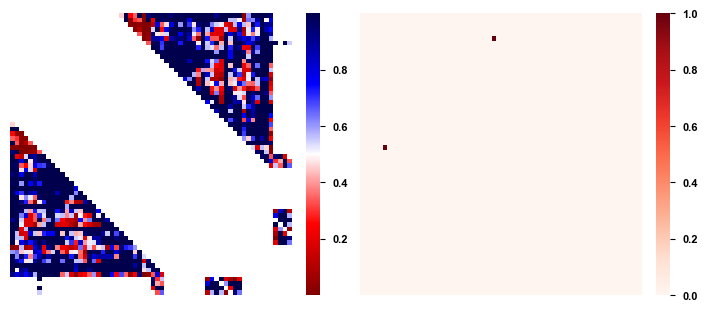

In [24]:
caller = sf.tl.LoopCaller(1e-4, cut_lo=5e3, gap=1e4, outer_cut=5e4)
res = caller.call_loops(adata)
df = caller.to_bedpe(res, adata)
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
sf.pl.pairwise_heatmap(res["fdr"], ax=axes[0])
sf.pl.pairwise_heatmap(res["summit"], ax=axes[1], cmap="Reds")
df[df["summit"]]

In [ ]:
sf.pl.background_model(10, 10, )

In [ ]:
from matplotlib.colors import Colormap

[Text(0.5, 0, 'x (nm)'), Text(0.5, 0.5, 'y (nm)'), Text(0.5, 0, 'z (nm)')]

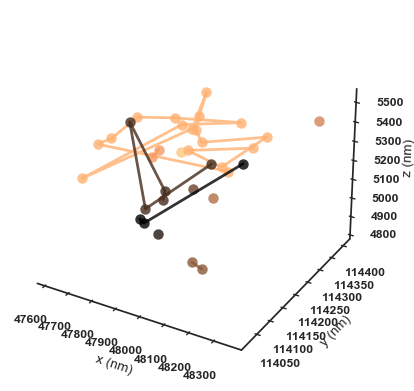

In [137]:
cmap = plt.get_cmap("copper_r")
X = np.stack([adata[4].layers[c][0] for c in ["X", "Y", "Z"]])

segments = []
na_flag = True
for i, x in enumerate(X.T):
    if np.all(~np.isnan(x)):
        if na_flag:
            segments.append([x])
        else:
            segments[-1].append(x)
        na_flag = False
    else:
        na_flag = True
segments = [np.array(t).reshape(-1, 3).T for t in segments]
colors = cmap(np.linspace(0, cmap.N, len(segments)).astype("int"))

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection="3d")
for segment, c in zip(segments, colors):
    ax.plot(*segment, ".-", markersize=15, linewidth=2, alpha=0.8, color=c)
ax.grid(False)
ax.xaxis.set_pane_color((0.0,0.0,0.0,0.0))
ax.yaxis.set_pane_color((0.0,0.0,0.0,0.0))
ax.zaxis.set_pane_color((0.0,0.0,0.0,0.0))
ax.set(xlabel="x (nm)", ylabel="y (nm)", zlabel="z (nm)")

In [115]:
plt.colormaps

In [119]:
import scanpy as sc

In [123]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [133]:
sns.set_context('paper')
plt.style.use('seaborn-v0_8-white')

/var/folders/r1/8ss2m8yd3616s_v12l580jcw0000gn/T/ipykernel_21964/2332526149.py:21: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)


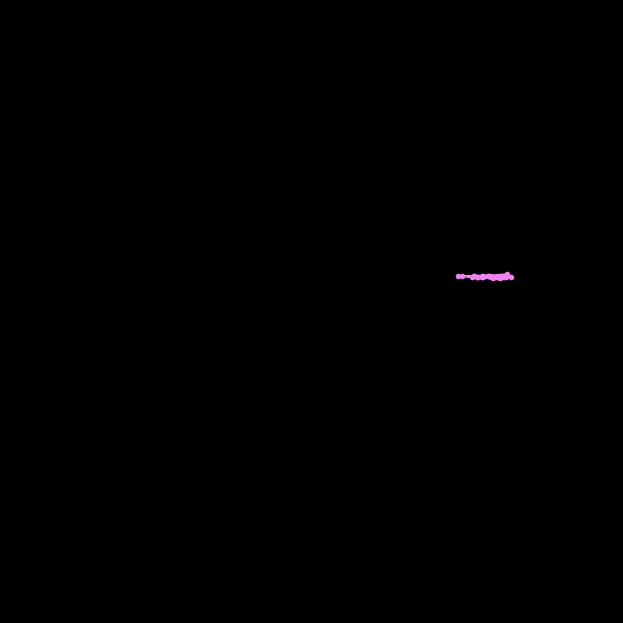

In [68]:
plot_animation = False
hide_axes = True
add_refBar = True
refBar_len = 5 # in um
angle = 3

add_cbar = False

_homolog_2_color = {0:'violet', 1:'yellow'}

plot_radius = 3.2

marker_size = 4
marker_alpha = 1

depthshade=False
fig = plt.figure(figsize=(3,3), dpi=200)

ax3d = fig.add_subplot(111, projection='3d', azim=0, elev=30)
#ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# scatter plot
for _ihomo, _zxys in enumerate([X.T]):
    #print(_chr)
    _valid_inds = (np.isnan(_zxys).sum(1) == 0)
    _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                       color=_homolog_2_color[_ihomo], 
                       s=marker_size, depthshade=depthshade, 
                       alpha=marker_alpha,
                       #edgecolors=_edge_colors, 
                       linewidth=0, label=f"h_{_ihomo}")
    _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                    color=_homolog_2_color[_ihomo], linewidth=0.75, alpha=marker_alpha)

# ax3d.tick_params('both', labelsize=_font_size-0.5, 
#                     width=_ticklabel_width, length=_ticklabel_size,
#                     pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
# ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
# ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
# ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
# ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
# ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
# ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)

In [19]:
d1d = adata.var["Chrom_Start"]
(d1d.shift() - d1d).values

array([     nan,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000.,   -5000.,   -5000.,
         -5000.,   -5000.,   -5000.,   -5000., -360000.,   -5000.,
         -5000.,   -5000.])

In [12]:
np.sum(~np.isnan(res["axis_pval"]))

0

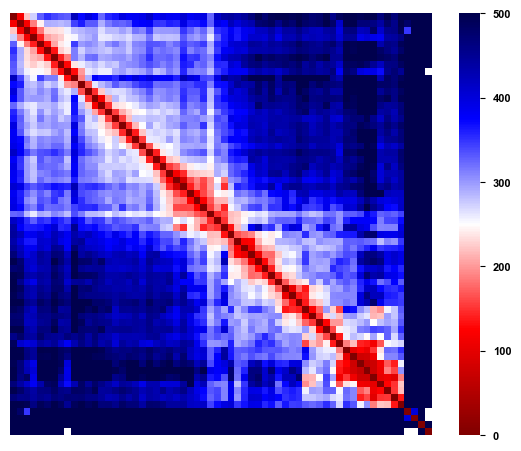

In [50]:
med_dist = sf.pp.median_pdist(adata, inplace=False)
sf.pl.pairwise_heatmap(med_dist, vmax=500)

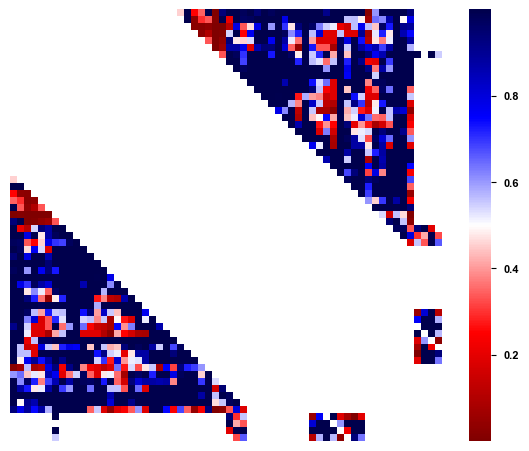